# Introduction

This data set, compiled by scraping the public profiles of nearly sixty thousand Bay Area, CA OkCupid users in June of 2012, includes typical user information, lifestyle variables, and text responses to 10 essays questions. This data was originally collected for academic purposes by Middlebury College and Reed College. I hope to identify correlations between a user’s relationship status, user’s intentions on the dating website, and wordage used when answering the open-ended essay prompts. I am working with this data to analyze user relationship success (defined by their answer of their relationship status) and hopefully identify indicators that suggest user trustworthiness/untrustworthiness (looking specifically at user’s self-reported education, job, and income as compared to Bay Area, CA standards) as I am working with a team to make online/mobile dating safer. In my analysis, I hope to address questions such as:

•	Are there patterns of self-reported misrepresented/falsified information?
o	self-reported education, job, and income as compared to Bay Area, CA standards 
o	user height compared to California or US averages
•	To what extent are self-reported information misrepresented or exaggerated? Are there certain characteristics that are more likely to exaggerate?
o	I would like to find out if users do exaggerate variables as compared to US, CA, or SF averages.
•	Which words are used most often by individuals in different relationship statuses?



## Datasheet
Datasheet for OkCupid Profile Data for Introductory Statistics and Data Science Courses
Motivation for Dataset Creation 

Why was the dataset created? (e.g., were there specific tasks in mind, or a specific gap that needed to be filled?) 
The OkCupid profiles dataset contains information from 59,946 San Francisco users. This dataset was scraped from active profiles containing at least one photo in June 2012 and made available to the public. This data was collected for the intention of creating a rich and imperfect dataset for undergraduate data science and statistical exploration and analysis. 

What (other) tasks could the dataset be used for? Are there obvious tasks for which it should not be used? 
This data could be used for identifying specific product needs of individuals within the data. The specificity of the variables and direct identifiers enables one to use the data in conjunction with public data to identify a specific individual within this dataset with relative ease. While possible, this is a task that should not be done using this dataset because the data was obtained from scraping active profiles rather than receiving explicit permission to use the data for educational or analytical purposes.

Has the dataset been used for any tasks already? If so, where are the results so others can compare (e.g., links to published papers)? 
This data has been used for basic analysis and educational visualization. I have not found any academic publications on this dataset other than short articles such as the following: https://rstudio-pubs-static.s3.amazonaws.com/209370_b62220c849b946088b463fdbec935848.html 

Who funded the creation of the dataset? If there is an associated grant, provide the grant number. 
This data was created by professors Albert Y. Kim of Middlebury College and Adriana Escobedo-Land of Reed College without the need for grant funding. 

Any other comments? 
This rich dataset was created for undergraduate educational purposes and the literature I have been able to find are completed to the extent of a short exploratory assignment/project without intention of publishing in any respected journal. 
Dataset Composition
What are the instances? (that is, examples; e.g., documents, images, people, countries) Are there multiple types of instances? (e.g., movies, users, ratings; people, interactions between them; nodes, edges) 
Instances are an individual’s profile composed of basic information such as gender, sexual orientation, ethnicity, religion, education, and short essays answers to 10 prompts such as "Describe your typical Friday night" and "What is the first thing people notice about you?"

Are relationships between instances made explicit in the data (e.g., social network links, user/movie ratings, etc.)? 
There are no known relationships between instances except for the fact that they are all individuals who were located in the San Francisco Bay Area. 

How many instances of each type are there? 
This dataset consists 59,946 instances  of OkCupid profiles information from San Francisco users. 

What data does each instance consist of? “Raw” data (e.g., unprocessed text or images)? Features/attributes? Is there a label/target associated with instances? If the instances are related to people, are subpopulations identified (e.g., by age, gender, etc.) and what is their distribution? 
Each instance contains information about the user’s body_type, diet preference, drinking habits, drug habits, education, ethnicity, height, income, job, offspring, sexual orientation, pets, religion, sex, sign, smoking preference, languages spoken, relationship status, and answers to 10 open ended essay prompts listed below: 
essay0- My self summary
essay1- What I’m doing with my life
essay2- I’m really good at
essay3- The first thing people usually notice about me
essay4- Favorite books, movies, show, music, and food
essay5- The six things I could never do without
essay6- I spend a lot of time thinking about
essay7- On a typical Friday night I am
essay8- The most private thing I am willing to admit
essay9- You should message me if...

Is everything included or does the data rely on external resources? (e.g., websites, tweets, datasets) If external resources, a) are there guarantees that they will exist, and remain constant, over time; b) is there an official archival version. Are there licenses, fees or rights associated with any of the data? 
While the data was originally collected from an external source, everything is included in the contained dataset.

Are there recommended data splits or evaluation measures? (e.g., training, development, testing; accuracy/AUC) 
There are no recommended data splits or evaluation measures.

What experiments were initially run on this dataset? 
Have a summary of those results and, if available, provide the link to a paper with more information here. 
Basic correlations within the data between two variables have been run on this dataset with conclusions such as, “Generally the OkCupid data reflects many trends in the general population, such as drinking habit and income disparities. Other trends, such as ethnicity, diverge from the more general demongraphics.” -https://rstudio-pubs-static.s3.amazonaws.com/209370_b62220c849b946088b463fdbec935848.html 


Data Collection Process
How was the data collected? (e.g., hardware apparatus/sensor, manual human curation, software pro- gram, software interface/API; how were these con- structs/measures/methods validated?) 
Using a Python script, data was scraped from users’ public profiles on June 30, 2012; any non-publicly facing information such as messaging was not accessible.

Who was involved in the data collection process? (e.g., students, crowdworkers) How were they compensated? (e.g., how much were crowdworkers paid?) 
OkCupid users who were living within 25 miles of San Francisco, had active profiles on June 26, 2012, were online in the previous year, and had at least one picture in their profile was included in this dataset. These individuals were not compensated.

Over what time-frame was the data collected? Does the collection time-frame match the creation time-frame? 
Although the instances were validated to be active profiles on June 26, 2012, the data was collected on June 30, 2012;

How was the data associated with each instance acquired? Was the data directly observable (e.g., raw text, movie ratings), reported by subjects (e.g., survey responses), or indirectly inferred/derived from other data (e.g., part of speech tags; model-based guesses for age or language)? If the latter two, were they validated/verified and if so how? 
The data was collected directly from raw text submission from the OkCupid users. This raw data is, however, self-reported and therefore subject to bias and misrepresentation.

Does the dataset contain all possible instances? Or is it, for instance, a sample (not necessarily random) from a larger set of instances? 
This dataset does not contain all possible instances of OkCupid profiles within 25 miles of San Francisco. Instances without a profile picture, for instance, were not included in this dataset even though the profile picture was not included in the dataset.

If the dataset is a sample, then what is the population? 
What was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)? Is the sample representative of the larger set (e.g., geographic coverage)? If not, why not (e.g., to cover a more diverse range of in- stances)? How does this affect possible uses? 
Although the sampling strategy was random, this data set sampling is representative of the larger OkCupid San Francisco users, but not representative of the San Francisco demographics within the same dating age range.

Is there information missing from the dataset and why? 
(this does not include intentionally dropped instances; it might include, e.g., redacted text, withheld documents) Is this data missing because it was unavailable? 
Apart from blank answers from variables or essay prompts not being answered by an individual, this data does not include any dropped instances.

Are there any known errors, sources of noise, or redundancies in the data? 
Yes, this dataset was not able to remove profiles created by the same user despite known information regarding the existence of some users creating multiple profiles for him/her/themselves. This results in potential redundancies that cannot be removed. 
Data Preprocessing
What preprocessing/cleaning was done? (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of missing values, etc.) 
No preprocessing or cleaning was done to this dataset as it was intentionally left messy for students and other users of this dataset to clean.

Was the “raw” data saved in addition to the preprocessed/cleaned data? (e.g., to support unanticipated future uses) 
n/a (not preprocessed)

Is the preprocessing software available? 
n/a (not preprocessed)

Does this dataset collection/processing procedure achieve the motivation for creating the dataset stated in the first section of this datasheet? 
Yes, the lack of processing serves the purpose of creating a rich but imperfect dataset for educational and practice purposes.
Dataset Distribution
How is the dataset distributed? (e.g., website, API, etc.; does the data have a DOI; is it archived redundantly?) 
The dataset can be downloaded from https://cran.rstudio.com/web/packages/okcupiddata/index.html 

When will the dataset be released/first distributed? (Is there a canonical paper/reference for this dataset?) 
This dataset was published on August 19th, 2016. The canonical form https://CRAN.R-project.org/package=okcupiddata is used to link to the cran page.

What license (if any) is it distributed under? Are there any copyrights on the data? 
This data is licensed under CC0 1.0 Universal.
 
Are there any fees or access/export restrictions? Any other comments? 
None. 


Dataset Maintenance
Who is supporting/hosting/maintaining the dataset? 
How does one contact the owner/curator/manager of the dataset (e.g. email address, or other contact info)? 
The dataset is hosted at Middlebury College and all and comments can be sent to: Albert Y. Kim <albert.ys.kim@gmail.com>


Will the dataset be updated? How often and by whom? How will updates/revisions be documented and communicated (e.g., mailing list, GitHub)? Is there an erratum? 
This dataset is not planned to be updated. If the dataset is to be updated, the updates can be found via updated commits on http://github.com/rudeboybert/okcupiddata  

If the dataset becomes obsolete how will this be communicated? 
Any changes to the dataset will be found via updated commits on http://github.com/rudeboybert/okcupiddata  

Is there a repository to link to any/all papers/systems that use this dataset? 
There is no working repository to link any/all papers/systems that use this dataset.
If others want to extend/augment/build on this dataset, is there a mechanism for them to do so? If so, is there a process for tracking/assessing the quality of those contributions. What is the process for communicating/distributing these contributions to users? 
Unknown. The original publishers provide the python script (now broken due to OkCupid website redesign) originally used to scrape the data from OkCupid suggesting that the python script can be corrected and used to expand the dataset, but no process for assessing the quality of these additional contributions is mentioned.
Legal and Ethical Considerations

If the dataset relates to people (e.g., their attributes) or was generated by people, were they informed about the data collection? (e.g., datasets that collect writing, photos, interactions, transactions, etc.) 
No. This dataset was scraped from public OkCupid profiles which directly relates to people, their attributes, and sensitive psychographic information meant for other individuals looking for a relationship to view. The people were, however, never informed that their public data was collected and published for greater exposure than they intended.

If it relates to other ethically protected subjects, have appropriate obligations been met? (e.g., medical data might include information collected from animals) 
n/a
If it relates to people, were there any ethical review applications/reviews/approvals? (e.g. Institutional Review Board applications) 
From my research, I did not find any IRB applications.
If it relates to people, were they told what the dataset would be used for and did they consent? What community norms exist for data collected from human communications? If consent was obtained, how? Were the people provided with any mechanism to revoke their consent in the future or for certain uses? 
No, the people were not informed that their data was collected and therefore did not know what the dataset would be used for or how it would be distributed.

If it relates to people, could this dataset expose people to harm or legal action? (e.g., financial social or otherwise) What was done to mitigate or reduce the potential for harm? 
Yes, while any blatant identifiers such as profile name or location were omitted to maintain some anonymity, the distinguishing information such as body type, height, education, etc. could be easily used to cross reference with other public data to identify an individual and expose the individual’s potentially sensitive and personal answer submissions to the public. 

If it relates to people, does it unfairly advantage or dis- advantage a particular social group? In what ways? How was this mitigated? 
This dataset represents a higher percentage of ethnically Caucasian individuals as compared to the San Francisco population and therefore could disproportionately expose this population.
If it relates to people, were they provided with privacy guarantees? If so, what guarantees and how are these ensured? 
No, no privacy guarantees (see answer to Legal and Ethical considerations question1).

Does the dataset comply with the EU General Data Protection Regulation (GDPR)? Does it comply with any other standards, such as the US Equal Employment Opportunity Act? 
The dataset does not comply with GDPR because subjects were not asked for their consent.

Does the dataset contain information that might be considered sensitive or confidential? (e.g., personally identifying information) 
Yes, distinguishing information such as body type, height, education, etc. could be easily used to cross reference with other public data to identify an individual and expose the individual’s potentially sensitive and personal answer submissions to the public. 

Does the dataset contain information that might be considered inappropriate or offensive? 
Yes, answers to some of the open-ended essay prompts can be considered inappropriate or offensive as these answers were not monitored for inappropriate or offensive content.


In [1]:
## Notebook
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='svg'

## instance data

#### Each instance consists of the following variables :

body_type

diet

drinks (alcoholic drinking habits)

drugs (drug use habits)

education

ethnicity

height (in inches)

income 

job

offspring (current or desired)

orientation (sexual)

pets

religion

sex

sign

smokes (smoking habits)

speaks (language and fluency)

status (relationship)

essay0- My self summary
essay1- What I’m doing with my life
essay2- I’m really good at
essay3- The first thing people usually notice about me
essay4- Favorite books, movies, show, music, and food
essay5- The six things I could never do without
essay6- I spend a lot of time thinking about
essay7- On a typical Friday night I am
essay8- The most private thing I am willing to admit
essay9- You should message me if...

## MERGE

In [2]:
#merging 3 datasets using cross reference "identifier" number
data=pd.read_csv('./profilesData.csv')
essay1=pd.read_csv('./essayAnswers.csv')
essay2=pd.read_csv('./essayAnswers2.csv')


display (data, essay1, essay2)

/miniconda3/envs/em212/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,1,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,2,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,3,38,thin,anything,socially,NaN,graduated from masters program,NaN,68,-1,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,4,23,thin,vegetarian,socially,NaN,working on college/university,white,71,20000,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,5,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66,-1,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,6,29,average,mostly anything,socially,NaN,graduated from college/university,white,67,-1,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,7,32,fit,strictly anything,socially,never,graduated from college/university,"white, other",65,-1,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,8,31,average,mostly anything,socially,never,graduated from college/university,white,65,-1,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,9,24,NaN,strictly anything,socially,NaN,graduated from college/university,white,67,-1,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,10,37,athletic,mostly anything,not at all,never,working on two-year college,white,65,-1,...,"san mateo, california",NaN,straight,likes dogs and likes cats,atheism and laughing about it,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single


,Identifier,essay0,essay1,essay2,essay3,essay4
0,1,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi..."
1,6,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring..."
2,10,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...
3,11,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie..."
4,12,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...
5,17,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc:<br />\nthe big lebowski (and ot...
6,18,to sum myself in whole: i have adventurous ten...,i'm currently studying and majoring in crimina...,hmm...i know i can take a test rather well.;) ...,physically-i've been told my eyes. people usua...,i'm much more of a movie goer. favorite actor:...
7,19,some of my favorite things:<br />\nriding my m...,"enjoying it, exploring limits, looking for love","understanding, appreciating, i like getting a ...",blue eyes and a kind soul... although i don't ...,"i like stories that are adventurous, fun, and ..."
8,20,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin..."
9,23,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...


,Identifier,essay5,essay6,essay7,essay8,essay9
0,1,food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,6,"like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
2,10,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells
3,11,family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
4,12,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."
5,17,(in no particular order)<br />\n<br />\n- good...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...
6,18,my cellphone<br />\neye liner<br />\nfood<br /...,my next big vacation! who knows....maybe if i ...,"working out at the gym, sometimes watching a m...",i could beat you at a game of hold em'.....try...,you're interested?<br />\n<br />\nand you also...
7,19,"compassion, love, art, my motorcycle, stretchi...",i like thinking about ways to improve things. ...,"last friday i had dinner with my roommates, an...",i have liked vampire novels ever since finding...,"because i'll try to write back, and it's hard ..."
8,20,"juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.
9,23,"1) sf restaurants, could they be any better?<b...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...


In [3]:
essays = pd.merge(essay1, essay2)
essays.head(6)

,Identifier,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,1,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,6,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
2,10,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells
3,11,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
4,12,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."
5,17,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc:<br />\nthe big lebowski (and ot...,(in no particular order)<br />\n<br />\n- good...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...


In [4]:
d = pd.merge(data, essays)
d.head(6)

,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,1,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,...,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,6,29,average,mostly anything,socially,NaN,graduated from college/university,white,67,-1,...,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
2,10,37,athletic,mostly anything,not at all,never,working on two-year college,white,65,-1,...,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells
3,11,35,average,mostly anything,socially,NaN,NaN,white,70,-1,...,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
4,12,28,average,mostly anything,socially,never,graduated from college/university,white,72,40000,...,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."
5,17,33,fit,NaN,socially,NaN,working on masters program,white,70,-1,...,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc:<br />\nthe big lebowski (and ot...,(in no particular order)<br />\n<br />\n- good...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...


## Cleaning

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29881 entries, 0 to 29880
Data columns (total 32 columns):
Identifier     29881 non-null int64
age            29881 non-null object
body_type      27639 non-null object
diet           18727 non-null object
drinks         28925 non-null object
drugs          22765 non-null object
education      27575 non-null object
ethnicity      27630 non-null object
height         29880 non-null object
income         29881 non-null object
job            27169 non-null object
last_online    29881 non-null object
location       29880 non-null object
offspring      12669 non-null object
orientation    29880 non-null object
pets           22173 non-null object
religion       22098 non-null object
sex            29879 non-null object
sign           26129 non-null object
smokes         27800 non-null object
speaks         29864 non-null object
status         29879 non-null object
essay0         29879 non-null object
essay1         29880 non-null object
essa

Text(0.5, 1.0, 'Percent Missing by Variable')

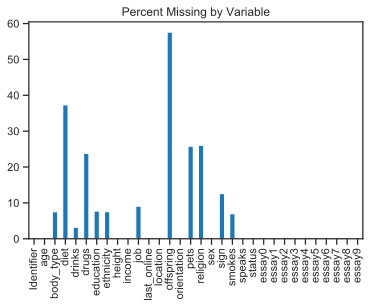

In [6]:
((d.isnull().sum()/len(d)) * 100).plot(kind='bar')
plt.title('Percent Missing by Variable')

Cleaning data by removing variables that will not be analyzed due to subjectivity (ex. "body type" is very subjective in this data as it is not based on weight or weight to heigh ratio rather users had options to choose answers such as "curvy" or "a little extra") or simply will not be analyzed due to irrelevance ("last online" is irrelevant to my analysis as these datapoints were collected only if they were online in the past month).

In [7]:
d.drop('last_online', axis=1, inplace=True)
d.head(6)

,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,1,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,...,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,6,29,average,mostly anything,socially,NaN,graduated from college/university,white,67,-1,...,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
2,10,37,athletic,mostly anything,not at all,never,working on two-year college,white,65,-1,...,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells
3,11,35,average,mostly anything,socially,NaN,NaN,white,70,-1,...,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
4,12,28,average,mostly anything,socially,never,graduated from college/university,white,72,40000,...,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."
5,17,33,fit,NaN,socially,NaN,working on masters program,white,70,-1,...,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc:<br />\nthe big lebowski (and ot...,(in no particular order)<br />\n<br />\n- good...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...


In [8]:
d.age = pd.to_numeric(d.age, errors='coerce').fillna(0).astype(np.int64)
d.height = pd.to_numeric(d.height, errors='coerce').fillna(0).astype(np.int64)
d.income = pd.to_numeric(d.income, errors='coerce').fillna(0).astype(np.int64)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29881 entries, 0 to 29880
Data columns (total 31 columns):
Identifier     29881 non-null int64
age            29881 non-null int64
body_type      27639 non-null object
diet           18727 non-null object
drinks         28925 non-null object
drugs          22765 non-null object
education      27575 non-null object
ethnicity      27630 non-null object
height         29881 non-null int64
income         29881 non-null int64
job            27169 non-null object
location       29880 non-null object
offspring      12669 non-null object
orientation    29880 non-null object
pets           22173 non-null object
religion       22098 non-null object
sex            29879 non-null object
sign           26129 non-null object
smokes         27800 non-null object
speaks         29864 non-null object
status         29879 non-null object
essay0         29879 non-null object
essay1         29880 non-null object
essay2         29881 non-null object
essay3 

In [9]:
print("The dataset contains {} instances".format(len(d)))

m=d[d["sex"]=="m"] # male users
f=d[d["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(m),len(m)/len(d),
    len(f),len(f)/len(d)))

The dataset contains 29881 instances
18152 males (60.7%), 11727 females (39.2%)


## Age 

In [10]:
print("Age statistics:\n{}".format(d["age"].describe()))

Age statistics:
count    29881.000000
mean        32.813761
std          9.702138
min          0.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64


In [11]:
print("There are {} users older than 70. looking at these two instances, these two users are clear outliers and most likely false accounts:")
d[d["age"]>70]

There are {} users older than 70. looking at these two instances, these two users are clear outliers and most likely false accounts:


,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9


In [12]:
d=d[d["age"]<=70] #remove 

print("Dataset age distribution after removing instances with age above 70".format(len(d)))

m=d[d["sex"]=="m"] # male users
f=d[d["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(m),len(m)/len(d),
    len(f),len(f)/len(d)))

print("Age statistics:\n{}".format(d["age"].describe()))

Dataset age distribution after removing instances with age above 70
18152 males (60.7%), 11727 females (39.2%)
Age statistics:
count    29881.000000
mean        32.813761
std          9.702138
min          0.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64


In [13]:
d[d["height"]>80]

,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
1244,2570,26,NaN,strictly other,NaN,NaN,graduated from college/university,native american,95,-1,...,about two months ago i bought a 10-pack of pla...,wading thigh-high into the autism spectrum.,nope!,"the ""kick me"" sign on my back as i run away fr...","books: envy, the master and margarita, a confe...","i hardly ""do"" by any measure.","retinol, dha, epa, k2. getting my chupacabra h...",sure as hell not skipping tuba practice.,the books on that air-tight list of favorite b...,"you aren't necessarily the first one to yell ""..."
1442,3017,30,fit,NaN,socially,never,graduated from law school,white,95,-1,...,spontaneous guy with a get-up-and-go kind of m...,"this is an incredibly difficult question, if y...",im pretty good at getting what i want. if i de...,"my hair... don't get me wrong, it looks almost...",too much to go into here..,"1. cuddling - yes, i said it ;)<br />\n2. art<...",i think a lot about my career and working towa...,this is a tough one. either i am truly pumped ...,my eyes can get a little watery during emotion...,you've caught yourself smiling at any point wh...
3220,6564,21,athletic,strictly anything,socially,never,working on college/university,white,81,-1,...,i'm a bay area guy and student at uc berkeley ...,you can probably find me at a baseball game at...,just having a good time at whatever i'm doing....,"definitely my height, it's hard to miss. then,...","movies: top gun, wedding crashers, miracle, et...",1.) my friends<br />\n2.) food<br />\n3.) spor...,i often lie in bed at night thinking about wha...,"hanging out, eating a lot of food and/or sleep...",you'll see...,you want to meet someone tall and fun and/or w...
4005,8090,55,rather not say,NaN,desperately,often,dropped out of high school,"asian, middle eastern, black, native american,...",95,20000,...,"my life has been a gigantic failure, and a hug...","as little as possible, so as not to use up ene...",smoking<br />\ndrinking<br />\ncheating<br />\...,my charm.<br />\nmy fourth leg.<br />\n(someho...,anything i am in.,guinness.<br />\nscotch.<br />\nvodka.<br />\n...,me.<br />\n<br />\nand what others like so muc...,"oh, i can never remember that. friday nights. ...",i nearly bought a hybrid.,you think i am god's gift to womankind.
4369,8838,30,fit,mostly anything,socially,never,graduated from college/university,"middle eastern, white, other",81,-1,...,writing about one's self is never an easy task...,i work in marketing and web development.<br />...,"reaching things on high shelves, lol j/k.<br /...","my height, and yes that is my real height, tha...",music: almost everything<br />\ntv shows: ncis...,"family, passport, friends, music....",where i'm going to travel to next....,"out with friends, small weekend trips or depen...",i'm a ninja.... no but that would be awesome. ...,- i'm looking for someone who can laugh at the...
6047,12182,31,jacked,NaN,often,NaN,college/university,white,93,1000000,...,"<a class=""plink"" href=\n""/profile/if+you+plan+...","enjoying it...with good friends, good food and...",-making fun of stupid people and bad drivers<b...,probably that i can come off sweet and then wh...,i'm a foodie fo'sho. i like almost every type ...,"screw 6, i'll give you 13, since it's a much b...",the weekend and what i plan on doing each and ...,probably eating dinner with the boyfriend and ...,i watch jersey shore.,you want to and have something semi-interestin...
6625,13288,20,fit,mostly anything,socially,never,working on college/university,white,82,20000,...,i have been stranded on this planet and am the...,building a plane<br />\nstudying<br />\nrepair...,what am i not good at is more the question.......,i believe that people usually note that i am t...,"i like to anything by lovecraft, asimov, and a...",god<br />\nfamily<br />\ncountry<br />\nfriend...,my next big idea! which at this poin

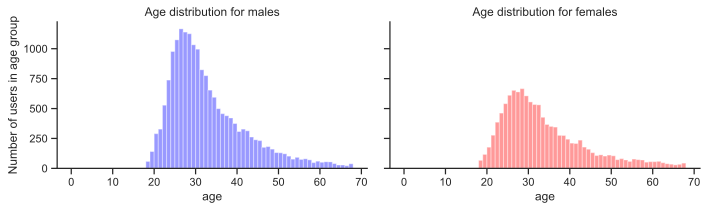

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(m["age"], ax=ax1,
             bins=range(d["age"].min(),d["age"].max()),
             kde=False,
             color="b")
ax1.set_title("Age distribution for males")
sns.distplot(f["age"], ax=ax2,
             bins=range(d["age"].min(),d["age"].max()),
             kde=False,
             color="r")
ax2.set_title("Age distribution for females")
ax1.set_ylabel("Number of users in age group")
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

## Height

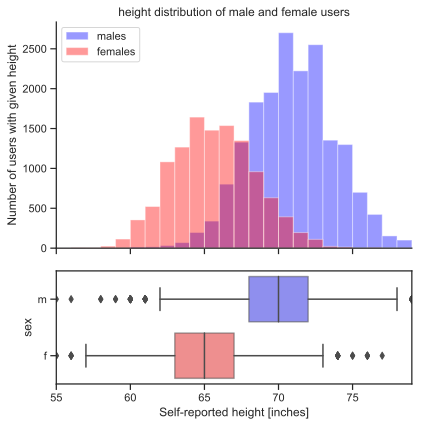

In [15]:
fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(6,6),gridspec_kw={'height_ratios':[2,1]})

# Plot histograms of height
bins=range(55,80)
sns.distplot(m["height"].dropna(), ax=ax,
             bins=bins,
             kde=False,
             color="b",
             label="males")
sns.distplot(f["height"].dropna(), ax=ax,
             bins=bins,
             kde=False,
             color="r",
             label="females")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of users with given height")
ax.set_title("height distribution of male and female users");

# boxplot alignment
sns.boxplot(data=d,y="sex",x="height",orient="h",ax=ax2,palette={"m":"b","f":"r"})
plt.setp(ax2.artists, alpha=.5)
ax2.set_xlim([min(bins),max(bins)])
ax2.set_xlabel("Self-reported height [inches]")

sns.despine(ax=ax)
fig.tight_layout()


In [16]:
cdc=pd.read_csv("https://www.cdc.gov/growthcharts/data/zscore/statage.csv")

print("10 rows of cdc growth chart data")
cdc.head(11)

10 rows of cdc growth chart data


,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118
5,1,28.5,0.407697,89.910409,0.040909,83.149450,83.980453,85.269620,87.449772,89.910409,92.411590,94.697570,96.081488,96.986625
6,1,29.5,0.286762,90.629078,0.040952,83.838194,84.669484,85.960983,88.150284,90.629078,93.157190,95.475221,96.881980,97.803453
7,1,30.5,0.174489,91.332424,0.040965,84.515583,85.346943,86.640272,88.837454,91.332424,93.884956,96.232394,97.660267,98.596905
8,1,31.5,0.069445,92.021272,0.040950,85.182380,86.013566,87.308201,89.512019,92.021272,94.595854,96.970215,98.417579,99.368283
9,1,32.5,-0.029721,92.696379,0.040909,85.839250,86.669993,87.965401,90.174637,92.696379,95.290799,97.689781,99.155138,100.118893


In [17]:
cdc["Age"]=cdc["Agemos"]/12
cdc["Sex"]=cdc["Sex"].replace({1:"m",2:"f"}) 
percentiles=[3,5,10,25,50,75,90,95,97]
percentile_columns=["P"+str(p) for p in percentiles] 
cdc[percentile_columns]=cdc[percentile_columns]*0.393701 
cdc20=cdc[cdc["Age"]==20].set_index("Sex") 

print("Height Percentiles for 20-year-old US population [inches]")
cdc20.head()


Height Percentiles for 20-year-old US population [inches]


,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97,Age
Sex,,,,,,,,,,,,,,
m,240.0,1.167279,176.849232,0.040370,64.304496,64.975961,66.007627,67.725520,69.625720,71.517283,73.212615,74.224061,74.879691,20.0
f,240.0,1.108046,163.338251,0.039636,59.492618,60.098742,61.030770,62.584736,64.306433,66.023163,67.564157,68.484561,69.081584,20.0


In [18]:
mheights=m.loc[m["age"]==20,"height"] # heights of 20-year-old males
fheights=f.loc[f["age"]==20,"height"] # heights of 20-year-old females

# For each of the available percentiles in CDC data, compute the corresponding percentile from our 20-year-old users
stats=[]
for percentile,percentile_column in zip(percentiles,percentile_columns):
    stats.append({"sex":"m",
                  "percentile":percentile,
                  "CDC":cdc20.loc["m",percentile_column],
                  "users":mheightsj.quantile(percentile/100)})
    stats.append({"sex":"f",
                  "percentile":percentile,
                  "CDC":cdc20.loc["f",percentile_column],
                  "users":fheightsj.quantile(percentile/100)})
stats=pd.DataFrame(stats).set_index(["sex","percentile"]).sort_index()

# For each percentile, compute the gap between users and CDC
stats["gap"]=stats["users"]-stats["CDC"]

fig,(ax1,ax2)=plt.subplots(ncols=2,sharex=True,figsize=(10,4))
stats.loc["m"][["users","CDC"]].plot.bar(ax=ax1,color=[[0.5,0.5,1],"k"],alpha=1,width=0.8,rot=0)
stats.loc["f"][["users","CDC"]].plot.bar(ax=ax2,color=[[1,0.5,0.5],"k"],alpha=1,width=0.8,rot=0)
ax1.set_ylim([64,77])
ax2.set_ylim([58,71])
ax1.set_ylabel("Height [inches]")
ax2.set_ylabel("Height [inches]")
ax1.set_title("Height percentiles in 20y-old male users vs CDC data")
ax2.set_title("Height percentiles in 20y-old female users vs CDC data")
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

NameError: name 'mheightsj' is not defined

The height statistics of this dataset are evidently exaggerated as shown above. Other explanations could include that Bay Area residents are taller than the average American, but considering this OkCupid data contains higher asian and latino percentages (both ethnicities with shorter averages) as compared to the US averages, this OkCupid data should actually be lower than the US averages. Another explanation could be that shorter users decide to hide that societally undesirable trait omitted. However, a quick check shows that the remaining instances in my data has zero instances of missing height data.

Interestingly, upon further research, OkCupid has already published this information regarding over exaggeration of height, income, age etc. in this article: https://theblog.okcupid.com/the-big-lies-people-tell-in-online-dating-a9e3990d6ae2. This article did not mention what data they used or how they computed their findings (however this is fairly easy so it makes sense why they only published their results).

In [47]:
d.describe()

,Identifier,age,height,income
count,29881.000000,29881.000000,29881.000000,29881.000000
mean,30216.343529,32.813761,68.350591,23458.609685
std,17484.642693,9.702138,4.098075,109497.237841
min,1.000000,0.000000,0.000000,-1.000000
25%,14893.000000,26.000000,66.000000,-1.000000
50%,30326.000000,30.000000,68.000000,-1.000000
75%,45373.000000,37.000000,71.000000,-1.000000
max,60552.000000,69.000000,95.000000,1000000.000000


In [45]:
dcopy = d.copy()
dcopy.head(2)

,Identifier,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essays
0,1,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,about me:<br />\n<br />\ni would love to thin...
1,6,29,average,mostly anything,socially,NaN,graduated from college/university,white,67,-1,...,building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,"i'm an australian living in san francisco, bu..."


In [51]:
#removed non int variables
dcopy.head(7)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
dcopy.info()

In [39]:
X = dcopy.iloc[:, 0:4].values  
y = dcopy.iloc[:, 4].values  

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

ValueError: could not convert string to float: 'athletic'

In [52]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

ValueError: could not convert string to float: 'athletic'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

# Conclusion

From this data analysis, we see evidence of clear exaggeration as a result of self reporting. Certain groups exagerrate more than others such as men in respect to height and income exaggerating more than women (not all data is shown in this notebook due to removal of jupyter cells that were not cooperating despite working previously). THe random forest for classification exercise resulted in an accuracy of .92. Given more time, a complete cross reference of all categorical variables and resulting exageration associated with each variable based on height and income (the most common exaggerated variables), would create a more holistic representation of various demographics that have higher exageration. More interestingly, analyzing the essays and determening various psychographics could be executed and utilized to analyze exagerration from a less looked at and probably more subjective angle. While subjective, psychographic analysis could uncover trends previously unseen.

697994 
542916 i
463204 and
453752 a
411997 the
386834 to
236733 of
235478 my
191180 in
182534 br
